In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import os
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import KFold

# **CEFAR10 Data Load**

In [ ]:
TRAIN_DIR = '/content/drive/MyDrive/Deep Learning/CIFAR-10-images-master/test'
CATEGORIES = os.listdir(TRAIN_DIR)

print(CATEGORIES)

['automobile', 'airplane', 'cat', 'deer', 'frog', 'bird', 'horse', 'ship', 'dog', 'truck']


#**Dataset and Preprocessing:**


In [ ]:
TRAIN_DATA = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR, c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        TRAIN_DATA.append([img_arr, CATEGORIES.index(c)])

    print(len(TRAIN_DATA))

100%|██████████| 1000/1000 [00:39<00:00, 25.45it/s]


1000


100%|██████████| 1000/1000 [00:13<00:00, 73.05it/s]


2000


100%|██████████| 1000/1000 [00:14<00:00, 68.22it/s]


3000


100%|██████████| 1000/1000 [00:14<00:00, 71.07it/s]


4000


100%|██████████| 1000/1000 [00:14<00:00, 67.15it/s]


5000


100%|██████████| 1000/1000 [00:15<00:00, 63.05it/s]


6000


100%|██████████| 1000/1000 [00:15<00:00, 65.77it/s]


7000


100%|██████████| 1000/1000 [00:17<00:00, 57.89it/s]


8000


100%|██████████| 1000/1000 [00:14<00:00, 67.08it/s]


9000


100%|██████████| 1000/1000 [00:13<00:00, 71.52it/s]

10000


0
(32, 32)


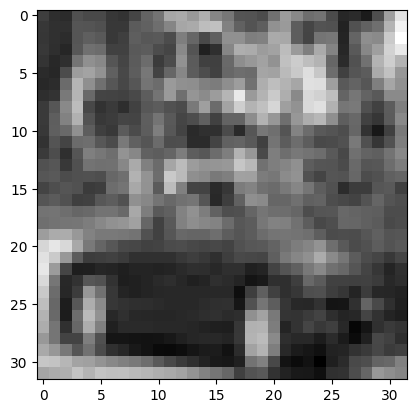

In [ ]:
plt.imshow(TRAIN_DATA[0][0], cmap="gray")
print(TRAIN_DATA[0][1])
print((TRAIN_DATA[0][0]).shape)

In [ ]:
print(TRAIN_DATA[1][1])

0


In [ ]:
random.shuffle(TRAIN_DATA)

In [ ]:
print(TRAIN_DATA[1][1])

8


#**Model Building and Evaluation:**


In [ ]:
k_val = [1, 3, 5, 7, 9]
k_error_for_L1 = {}
k_error_for_L2 = {}


In [ ]:
for k in k_val:
    k_error_for_L1[k] = []
    k_error_for_L2[k] = []


folds = []
fold_size = len(TRAIN_DATA) // 5
for i in range(5):
    fold = TRAIN_DATA[i * fold_size: (i + 1) * fold_size]
    folds.append(fold)

for i, test_val in enumerate(folds):
    train_val = [fold for j, fold in enumerate(folds) if j != i]

    All_accuracies_for_L1 = []
    All_accuracies_for_L2 = []

    for k in k_val:
        correct_prediction_count_L1 = 0
        correct_prediction_count_L2 = 0
        total_prediction = 0

        for test in tqdm(test_val):
            test_img = test[0]
            test_label = test[1]



            L1_distance_value = []
            L2_distance_value = []

            for t_fold in train_val:
                for train in t_fold:
                    train_img = train[0]
                    train_label = train[1]
                    sub_L1 = np.sum(np.abs(train_img - test_img))
                    L1_distance_value.append((sub_L1, train_label))

                    sub_L2 = np.sqrt(np.sum((train_img - test_img) ** 2))
                    L2_distance_value.append((sub_L2, train_label))

            L1_distance_value_sort = sorted(L1_distance_value, key=lambda x: x[0])[:k]
            near_L1 = [s[1] for s in L1_distance_value_sort]
            pred_L1 = max(set(near_L1), key=near_L1.count)
            L2_distance_value_sort = sorted(L2_distance_value, key=lambda x: x[0])[:k]
            near_L2 = [s[1] for s in L2_distance_value_sort]
            pred_L2 = max(set(near_L2), key=near_L2.count)
            if pred_L1 == test_label:
                correct_prediction_count_L1 += 1
            if pred_L2 == test_label:
                correct_prediction_count_L2 += 1
            total_prediction += 1

        accuracy_for_l1_single = correct_prediction_count_L1 / total_prediction
        All_accuracies_for_L1.append(accuracy_for_l1_single)
        k_error_for_L1[k].append(accuracy_for_l1_single)

        accuracy_for_l2_single = correct_prediction_count_L2 / total_prediction
        All_accuracies_for_L2.append(accuracy_for_l2_single)
        k_error_for_L2[k].append(accuracy_for_l2_single)
        print("k_values = {},Fold_number  {},  Accuracy_for_L1 = {:.2f}%, Accuracy_for_L2 = {:.2f}%".format(k,i, accuracy_for_l1_single * 100, accuracy_for_l2_single * 100))


100%|██████████| 2000/2000 [06:06<00:00,  5.46it/s]


k_values = 1,Fold_number  0,  Accuracy_for_L1 = 17.80%, Accuracy_for_L2 = 17.10%


100%|██████████| 2000/2000 [06:04<00:00,  5.48it/s]


k_values = 3,Fold_number  0,  Accuracy_for_L1 = 17.70%, Accuracy_for_L2 = 16.55%


100%|██████████| 2000/2000 [06:02<00:00,  5.51it/s]


k_values = 5,Fold_number  0,  Accuracy_for_L1 = 17.65%, Accuracy_for_L2 = 16.40%


100%|██████████| 2000/2000 [06:04<00:00,  5.49it/s]


k_values = 7,Fold_number  0,  Accuracy_for_L1 = 17.75%, Accuracy_for_L2 = 15.90%


100%|██████████| 2000/2000 [06:03<00:00,  5.50it/s]


k_values = 9,Fold_number  0,  Accuracy_for_L1 = 17.50%, Accuracy_for_L2 = 16.20%


100%|██████████| 2000/2000 [06:03<00:00,  5.51it/s]


k_values = 1,Fold_number  1,  Accuracy_for_L1 = 16.80%, Accuracy_for_L2 = 16.80%


100%|██████████| 2000/2000 [06:04<00:00,  5.49it/s]


k_values = 3,Fold_number  1,  Accuracy_for_L1 = 17.80%, Accuracy_for_L2 = 15.95%


100%|██████████| 2000/2000 [06:04<00:00,  5.48it/s]


k_values = 5,Fold_number  1,  Accuracy_for_L1 = 17.35%, Accuracy_for_L2 = 16.05%


100%|██████████| 2000/2000 [06:04<00:00,  5.49it/s]


k_values = 7,Fold_number  1,  Accuracy_for_L1 = 16.95%, Accuracy_for_L2 = 16.30%


100%|██████████| 2000/2000 [06:05<00:00,  5.46it/s]


k_values = 9,Fold_number  1,  Accuracy_for_L1 = 17.55%, Accuracy_for_L2 = 16.65%


100%|██████████| 2000/2000 [06:03<00:00,  5.50it/s]


k_values = 1,Fold_number  2,  Accuracy_for_L1 = 17.55%, Accuracy_for_L2 = 17.55%


100%|██████████| 2000/2000 [06:04<00:00,  5.49it/s]


k_values = 3,Fold_number  2,  Accuracy_for_L1 = 17.25%, Accuracy_for_L2 = 16.50%


100%|██████████| 2000/2000 [06:05<00:00,  5.48it/s]


k_values = 5,Fold_number  2,  Accuracy_for_L1 = 16.95%, Accuracy_for_L2 = 15.30%


100%|██████████| 2000/2000 [06:04<00:00,  5.49it/s]


k_values = 7,Fold_number  2,  Accuracy_for_L1 = 17.15%, Accuracy_for_L2 = 15.40%


100%|██████████| 2000/2000 [06:04<00:00,  5.49it/s]


k_values = 9,Fold_number  2,  Accuracy_for_L1 = 15.80%, Accuracy_for_L2 = 15.25%


100%|██████████| 2000/2000 [06:04<00:00,  5.49it/s]


k_values = 1,Fold_number  3,  Accuracy_for_L1 = 16.55%, Accuracy_for_L2 = 15.95%


100%|██████████| 2000/2000 [06:04<00:00,  5.48it/s]


k_values = 3,Fold_number  3,  Accuracy_for_L1 = 17.35%, Accuracy_for_L2 = 15.90%


100%|██████████| 2000/2000 [06:04<00:00,  5.49it/s]


k_values = 5,Fold_number  3,  Accuracy_for_L1 = 17.05%, Accuracy_for_L2 = 15.75%


100%|██████████| 2000/2000 [06:09<00:00,  5.41it/s]


k_values = 7,Fold_number  3,  Accuracy_for_L1 = 16.85%, Accuracy_for_L2 = 15.60%


100%|██████████| 2000/2000 [06:06<00:00,  5.46it/s]


k_values = 9,Fold_number  3,  Accuracy_for_L1 = 16.75%, Accuracy_for_L2 = 15.85%


100%|██████████| 2000/2000 [06:07<00:00,  5.45it/s]


k_values = 1,Fold_number  4,  Accuracy_for_L1 = 17.25%, Accuracy_for_L2 = 16.45%


100%|██████████| 2000/2000 [06:06<00:00,  5.45it/s]


k_values = 3,Fold_number  4,  Accuracy_for_L1 = 16.95%, Accuracy_for_L2 = 15.35%


100%|██████████| 2000/2000 [06:07<00:00,  5.45it/s]


k_values = 5,Fold_number  4,  Accuracy_for_L1 = 15.70%, Accuracy_for_L2 = 15.15%


100%|██████████| 2000/2000 [06:07<00:00,  5.44it/s]


k_values = 7,Fold_number  4,  Accuracy_for_L1 = 15.15%, Accuracy_for_L2 = 14.90%


100%|██████████| 2000/2000 [06:05<00:00,  5.47it/s]

k_values = 9,Fold_number  4,  Accuracy_for_L1 = 14.60%, Accuracy_for_L2 = 15.45%


#**Results and Analysis:**


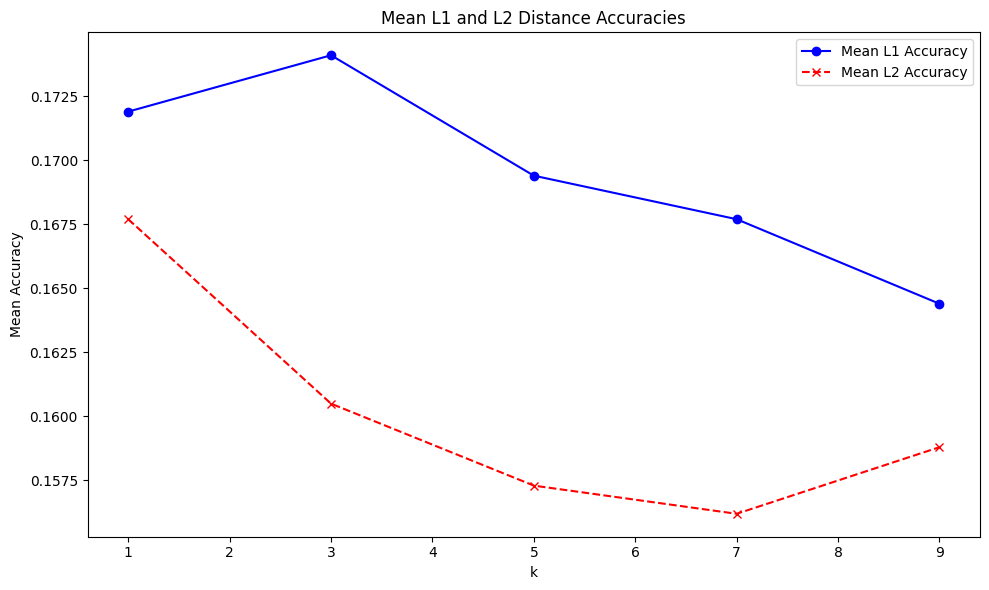

In [ ]:
k_values = list(k_val)


mean_accuracies_L1 = [np.mean(k_error_for_L1[k]) for k in k_values]
mean_accuracies_L2 = [np.mean(k_error_for_L2[k]) for k in k_values]


plt.figure(figsize=(10, 6))


plt.plot(k_values, mean_accuracies_L1, marker='o', label='Mean L1 Accuracy', linestyle='-', color='b')
plt.plot(k_values, mean_accuracies_L2, marker='x', label='Mean L2 Accuracy', linestyle='--', color='r')

plt.title('Mean L1 and L2 Distance Accuracies')
plt.xlabel('k')
plt.ylabel('Mean Accuracy')
plt.legend()


plt.tight_layout()
plt.show()

# **Discussion:**

In this analysis, we examined the performance of the Manhattan (L1) and Euclidean (L2) distance metrics for image classification using a 5-fold cross-validation approach on a grayscale version of the CIFAR-10 dataset. The objective was to compare the two distance calculation techniques and assess their suitability for this specific dataset.

  ### Dataset Characteristics:
  The CIFAR-10 dataset comprises 32x32 grayscale images distributed across ten different classes, making it a moderately complex dataset for image classification. The dataset includes a variety of objects, and classifying them accurately poses a challenging task.

  ### Performance Comparison:
  Based on our analysis, we compared the average accuracy values obtained from 5-fold cross-validation for both L1 and L2 distances. The results revealed that the average accuracy for L1 distances fell within the range of approximately 15.5% to 16.75%, while the average accuracy for L2 distances ranged from approximately 16.5% to 17.2%.

  ### Interpretation:
  The performance of both L1 and L2 distances indicates that these distance metrics can achieve relatively similar accuracy levels in the range of 15.5% to 17.2%. These results suggest that the grayscale CIFAR-10 dataset may not exhibit a significant preference for one distance metric over the other.

  ## Factors to Consider:
  ### Dataset Complexity:
   While the dataset is moderately complex, the relatively close performance of L1 and L2 distances suggests that neither metric significantly outperforms the other. This suggests that the nature of the features and the distribution of classes do not strongly favor one distance calculation technique.

  ## Hyperparameter Variation:
  The variation in accuracy within the given range of k values suggests that the choice of k may impact the performance of the k-NN algorithm. Further optimization of the hyperparameter k may lead to enhanced accuracy.

## Conclusion:
In this evaluation, both Manhattan (L1) and Euclidean (L2) distances displayed similar performance on the grayscale CIFAR-10 dataset, achieving average accuracy within the range of 15.5% to 17.2%. While these results indicate a balanced performance, further exploration of hyperparameter optimization and feature engineering may lead to improvements in classification accuracy. The choice between L1 and L2 distances should be made considering the specific characteristics and requirements of the dataset and application.
